# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
%matplotlib inline
from ipywidgets import interact
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
feature = 'sqft_living'
target = 'price'

X = df.drop(columns=target)

y = df[target]

In [0]:
X_train, X_test, y_train, y_test = train_test_split (X, y, train_size= .8, test_size=.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(pd.DataFrame(X_train[feature]), y_train)

model.coef_, model.intercept_

(array([279.55477932]), -41999.18603993731)

In [6]:
X_test['pred_price'] = model.predict(pd.DataFrame(X_test[feature]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_test = X_test.join(y_test)

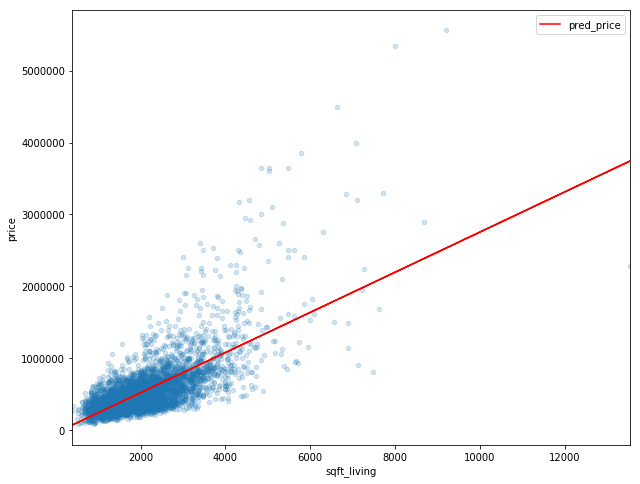

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
X_test.plot(x=feature, y=target, kind='scatter', ax=ax, alpha=.2)
X_test.plot(x=feature, y='pred_price', kind='line', color='red', ax=ax)
plt.show()

In [9]:
mse = mean_squared_error(y_true=X_test.price, y_pred=X_test.pred_price)
root_mse = mse**(0.5)
root_mse

276559.1746114674

In [10]:
r2 = r2_score(y_test, X_test['pred_price'])
r2

0.49406905389089006

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
features = [feature, 'bedrooms']

In [12]:
model2 = LinearRegression()
model2.fit(X_train[features], y_train)

model2.intercept_

76404.26223480108

In [13]:
model2.coef_

array([   312.15699349, -55228.54258621])

In [0]:
X_test['pred_price_2'] = model2.predict(pd.DataFrame(X_test[features]))

In [15]:
mse_2 = mean_squared_error(y_true=X_test.price, y_pred=X_test.pred_price_2)
root_mse_2 = mse_2**(0.5)
root_mse_2

272350.4787814998

In [16]:
r2_2 = r2_score(y_test, X_test['pred_price_2'])
r2_2

0.5093504668464703

In [0]:
beta_0 = model2.intercept_
beta_i = model2.coef_

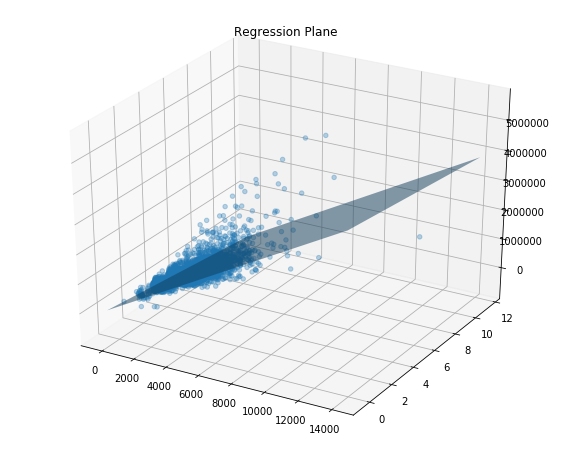

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(X_test[features[0]], X_test[features[1]], X_test['price'], alpha=.3)

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)

zz = beta_i[0]*xx + beta_i[1]*yy + beta_0

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
X_train = X_train.drop(columns=['id', 'date'])
X_test = X_test.drop(columns=['id', 'date'])

In [20]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
X_test['pred_price_all'] = model_all.predict(X_test.drop(columns = ['pred_price',	'price',	'pred_price_2']))

In [22]:
model_all.intercept_

6643873.527888497

In [23]:
model_all.coef_

array([-3.43354187e+04,  4.45645289e+04,  1.09015817e+02,  8.88473539e-02,
        7.00312952e+03,  5.62413070e+05,  5.36411070e+04,  2.45267101e+04,
        9.45678917e+04,  7.00227409e+01,  3.89930758e+01, -2.68076890e+03,
        2.04156328e+01, -5.52253038e+02,  5.95968122e+05, -1.94585724e+05,
        2.12143306e+01, -3.25831873e-01])

In [27]:
mse_all = mean_squared_error(y_true=X_test.price, y_pred=X_test.pred_price_all)
root_mse_all = mse_all**(0.5)
root_mse_all

212539.51663817815

In [25]:
r2_all = r2_score(y_test, X_test['pred_price_all'])
r2_all

0.7011904448878395

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
